(477, 848)
Size of the original image:  1213488
Size of the compressed image:  235733.33333333334
Compression ratio:  5.147714932126696


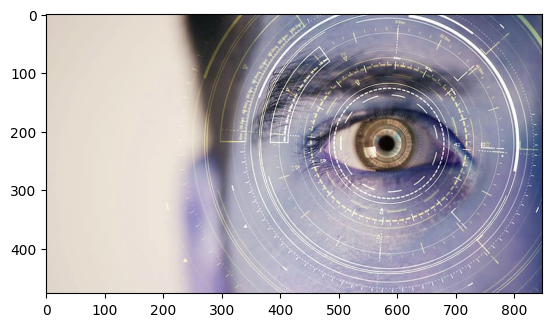

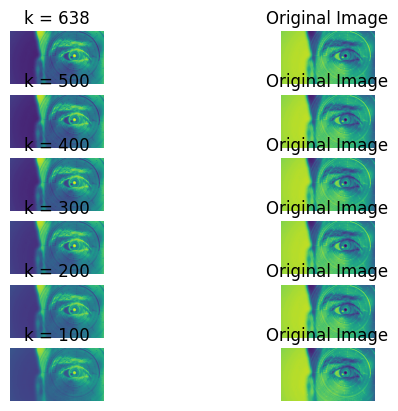

<Figure size 1600x800 with 0 Axes>

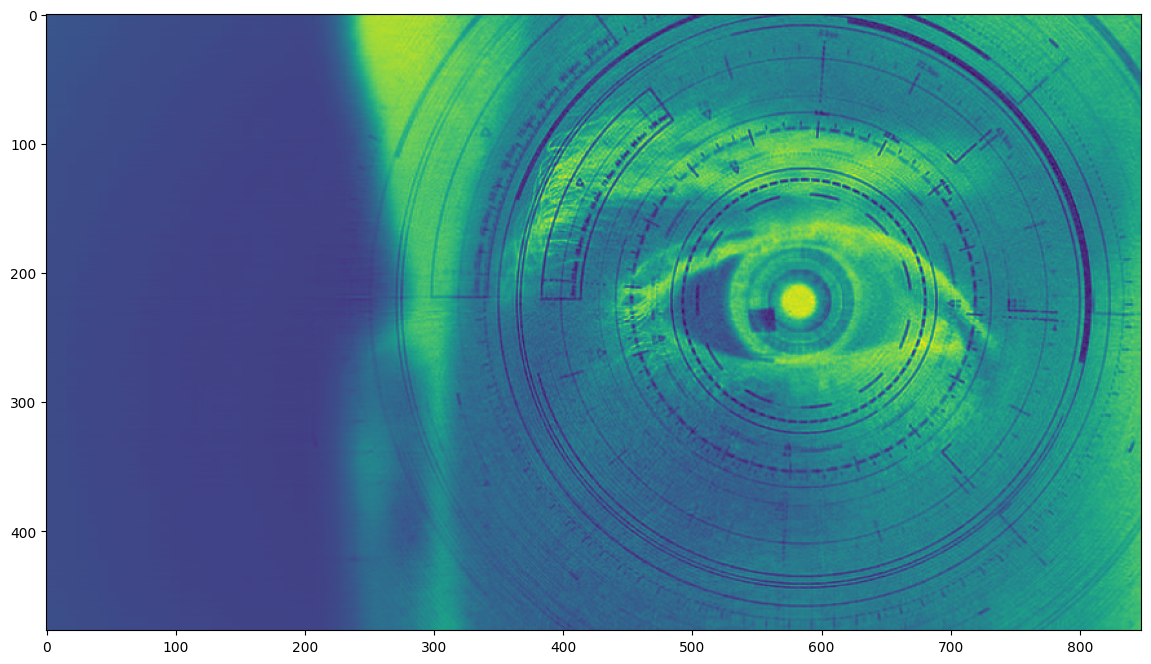

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.color import rgb2gray
from scipy.linalg import svd



img = cv2.imread('img.jpg')
plt.imshow(img)
gImg = rgb2gray(img)
print(gImg.shape)

# Compute the SVD of the image
U, S, V = svd(gImg,full_matrices=False)
S=np.diag(S)
comps = [638, 500, 400, 300, 200, 100]

fig,ax=plt.subplots(6,2)
plt.figure(figsize=(16, 8))
curFig=0

for i in range(len(comps)):
    low_rank = U[:, : comps[i]] @ S[0:comps[i], :comps[i]] @ V[: comps[i], :]
    ax[curFig][0].imshow(256-low_rank)
    ax[curFig][0].set_title("k = " +str(comps[i]))
    ax[curFig,0].axis('off')
    ax[curFig][1].set_title("Original Image")
    ax[curFig][1].imshow(gImg)
    ax[curFig,1].axis('off')
    curFig+=1
    
h,w,c=img.shape


low_rank = U[:, : comps[5]] @ S[0:comps[5], :comps[5]] @ V[: comps[5], :]
plt.figure(figsize=(16, 8))
plt.imshow(256-low_rank)

size = (comps[5]*h+comps[5]+comps[5]*w)/h*w
print("Size of the original image: ",h*w*c)
print("Size of the compressed image: ",size)
print("Compression ratio: ",h*w*c/size)
